<a href="https://colab.research.google.com/github/fiza-jamali/data-science-projects/blob/main/Untitled36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="A value is trying to be set on a copy of a DataFrame or Series through chained assignment")
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

In [6]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [8]:
data.describe().T

count           mean            std         min  \
longitude           17000.0    -119.562108       2.005166   -124.3500   
latitude            17000.0      35.625225       2.137340     32.5400   
housing_median_age  17000.0      28.589353      12.586937      1.0000   
total_rooms         17000.0    2643.664412    2179.947071      2.0000   
total_bedrooms      17000.0     539.410824     421.499452      1.0000   
population          17000.0    1429.573941    1147.852959      3.0000   
households          17000.0     501.221941     384.520841      1.0000   
median_income       17000.0       3.883578       1.908157      0.4999   
median_house_value  17000.0  207300.912353  115983.764387  14999.0000   

                              25%          50%         75%          max  
longitude             -121.790000    -118.4900    -118.000    -114.3100  
latitude                33.930000      34.2500      37.720      41.9500  
housing_median_age      18.000000      29.0000      37.000      52.0000  
total_rooms           1462.000000    2127.0000    3151.250   37937.0000  
total_bedrooms         297.000000     434.0000     648.250    6445.0000  
population             790.000000    1167.0000    1721.000   35682.0000  
households             282.000000     409.0000     605.250    6082.0000  
median_income            2.566375       3.5446       4.767      15.0001  
median_house_value  119400.000000  180400.0000  265000.000  500001.0000

In [9]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [12]:
data.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [13]:
data.duplicated().sum()


np.int64(0)

In [14]:
print("Number of Rows:",data.shape[0])

Number of Rows: 17000


In [15]:
print("Number of Column:",data.shape[1])

Number of Column: 9


In [17]:
numerical_columns = data.select_dtypes(include=['float64' , 'int64']).columns
for col in numerical_columns:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace = True)
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [18]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [19]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()
correlation_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0.106758     0.130991   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071802    0.101674    0.059628      -0.015485   
latitude                 -0.069373   -0.111261   -0.074902      -0.080303   
housing_median_age       -0.320434   -0.295890   -0.302754      -0.115932   
total_rooms               0.928403    0.860170    0.919018       0.195383   
total_bedrooms            1.000000    0.881169    0.980920      -0.013495   
population                0.881169    1.000000    0.909247      -0.000638   
households                0.980920    0.909247    1.000000       0.007644   
median_income            -0.013495   -0.000638    0.007644       1.000000   
median_house_value        0.045783   -0.027850    0.061031       0.691871   

                    median_house_value  
longitude                    -0.044982  
latitude                     -0.144917  
housing_median_age            0.106758  
total_rooms                   0.130991  
total_bedrooms                0.045783  
population                   -0.027850  
households                    0.061031  
median_income                 0.691871  
median_house_value            1.000000

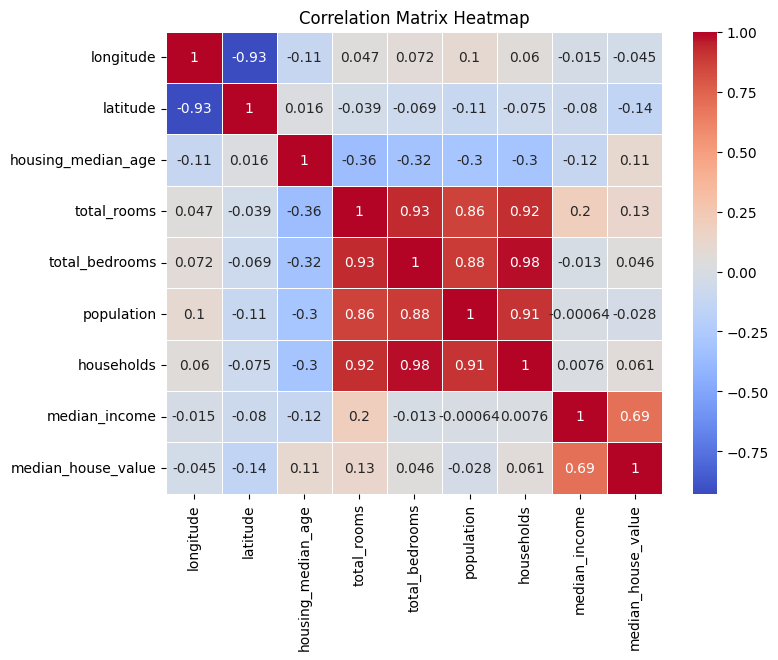

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
# data['species'].value_counts()

In [24]:
fig = px.bar(data, x=data['species'].value_counts().index, y=data['species'].value_counts().values,
             labels={'x': 'Species', 'y': 'Count'},
             title='Species Frequency',
             color=data['species'].value_counts().index,
             color_discrete_map={'Adelie': 'blue'},
             )

fig.update_layout(
    legend_title='Species',
    legend=dict(
        x=0.8,
        y=0.9
    ),
    title_font_size=24,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,
    width=700,
    height=500,
)

fig.show()

KeyError: 'species'

In [25]:
import plotly.express as px

# Calculate value counts for 'housing_median_age'
age_counts = data['housing_median_age'].value_counts().sort_index()

fig = px.bar(x=age_counts.index, y=age_counts.values,
             labels={'x': 'Housing Median Age', 'y': 'Count of Districts'},
             title='Distribution of Housing Median Age',
             color_discrete_sequence=px.colors.qualitative.Plotly # Use a qualitative color scheme
            )

fig.update_layout(
    title_font_size=24,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,
    width=900,
    height=600
)

fig.show()

In [27]:
data['median_income'].value_counts()

median_income
3.1250     41
2.8750     39
4.1250     39
15.0001    38
2.6250     36
           ..
1.2049      1
1.6395      1
0.8964      1
3.2097      1
3.0216      1
Name: count, Length: 11175, dtype: int64

In [29]:
import plotly.express as px

fig = px.scatter(data, x='median_income', y='median_house_value',
                 title='Median Income vs. Median House Value',
                 labels={'median_income': 'Median Income', 'median_house_value': 'Median House Value'})

fig.update_layout(
    title_font_size=24,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,
    width=900,
    height=600
)

fig.show()

In [31]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [33]:
import plotly.express as px

fig = px.scatter(data, x='total_rooms', y='median_house_value',
                 title='Total Rooms vs. Median House Value',
                 labels={'total_rooms': 'Total Rooms', 'median_house_value': 'Median House Value'})

fig.update_layout(
    title_font_size=24,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,
    width=900,
    height=600
)

fig.show()

In [35]:
numerical_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

for column in numerical_columns:
    fig = px.violin(data,
                    y=column,
                    box=True,
                    points='all',
                    title=f'Distribution of {column.replace("_", " ").title()}',
                    labels={column: column.replace("_", " ").title()}
                   )

    fig.update_layout(
        title_font_size=24,
        xaxis_title_font_size=18,
        yaxis_title_font_size=18,
        xaxis_tickfont_size=14,
        yaxis_tickfont_size=14,
        width=700,
        height=500,
    )

    fig.show()

In [37]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [39]:
# year_counts = data['year'].value_counts().reset_index()
# year_counts.columns = ['year', 'count']

# fig = px.pie(
#     year_counts,
#     names='year',
#     values='count',
#     title='Distribution of Data Over Years',
#     color='year',
#     height=500,
#     width=800
# )

# fig.update_layout(
#     legend_title='Year'
# )

# fig.show()

In [41]:
custom_colors = ['#FF9999', '#66B2FF', '#99FF99']

fig = px.histogram(
    data,
    x='housing_median_age',
    title='Distribution of Housing Median Age',
    labels={'housing_median_age': 'Housing Median Age'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Housing Median Age',
    yaxis_title='Count'
)

fig.show()

In [43]:
custom_colors = ['#FF9999', '#66B2FF', '#99FF99']

fig = px.histogram(
    data,
    x='housing_median_age',
    title='Distribution of Housing Median Age',
    labels={'housing_median_age': 'Housing Median Age'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Housing Median Age',
    yaxis_title='Count'
)

fig.show()

In [45]:
custom_colors = ['#FF9999', '#66B2FF', '#99FF99']

fig = px.histogram(
    data,
    x='housing_median_age',
    title='Distribution of Housing Median Age',
    labels={'housing_median_age': 'Housing Median Age'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Housing Median Age',
    yaxis_title='Count'
)

fig.show()

In [47]:
fig = px.scatter(
    data,
    x='total_rooms',
    y='median_house_value',
    color='median_house_value',
    color_continuous_scale='Viridis',
    title='Scatter Plot of Total Rooms vs. Median House Value',
    labels={'total_rooms': 'Total Rooms', 'median_house_value': 'Median House Value'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Total Rooms',
    yaxis_title='Median House Value',
    coloraxis_colorbar=dict(title='Median House Value')
)

fig.show()

In [49]:
fig = px.scatter(
    data,
    x='total_rooms',
    y='median_house_value',
    color='median_house_value',
    color_continuous_scale='Greens',
    title='Scatter Plot of Total Rooms vs. Median House Value',
    labels={'total_rooms': 'Total Rooms', 'median_house_value': 'Median House Value'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Total Rooms',
    yaxis_title='Median House Value',
    coloraxis_colorbar=dict(title='Median House Value')
)

fig.show()

In [51]:
fig = px.scatter(
    data,
    x='total_rooms',
    y='median_house_value',
    color='median_house_value',
    color_continuous_scale='Burg',
    title='Scatter Plot of Total Rooms vs. Median House Value',
    labels={'total_rooms': 'Total Rooms', 'median_house_value': 'Median House Value'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Total Rooms',
    yaxis_title='Median House Value',
    coloraxis_colorbar=dict(title='Median House Value')
)

fig.show()

In [53]:
fig = px.scatter(
    data,
    x='total_rooms',
    y='median_house_value',
    color='median_house_value',
    color_continuous_scale='Magenta',
    title='Scatter Plot of Total Rooms vs. Median House Value',
    labels={'total_rooms': 'Total Rooms', 'median_house_value': 'Median House Value'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Total Rooms',
    yaxis_title='Median House Value',
    coloraxis_colorbar=dict(title='Median House Value')
)

fig.show()

In [55]:
fig = px.scatter(
    data,
    x='total_rooms',
    y='median_house_value',
    color='median_house_value',
    color_continuous_scale='Teal',
    title='Scatter Plot of Total Rooms vs. Median House Value',
    labels={'total_rooms': 'Total Rooms', 'median_house_value': 'Median House Value'},
    height=500,
    width=800
)

fig.update_layout(
    xaxis_title='Total Rooms',
    yaxis_title='Median House Value',
    coloraxis_colorbar=dict(title='Median House Value')
)

fig.show()

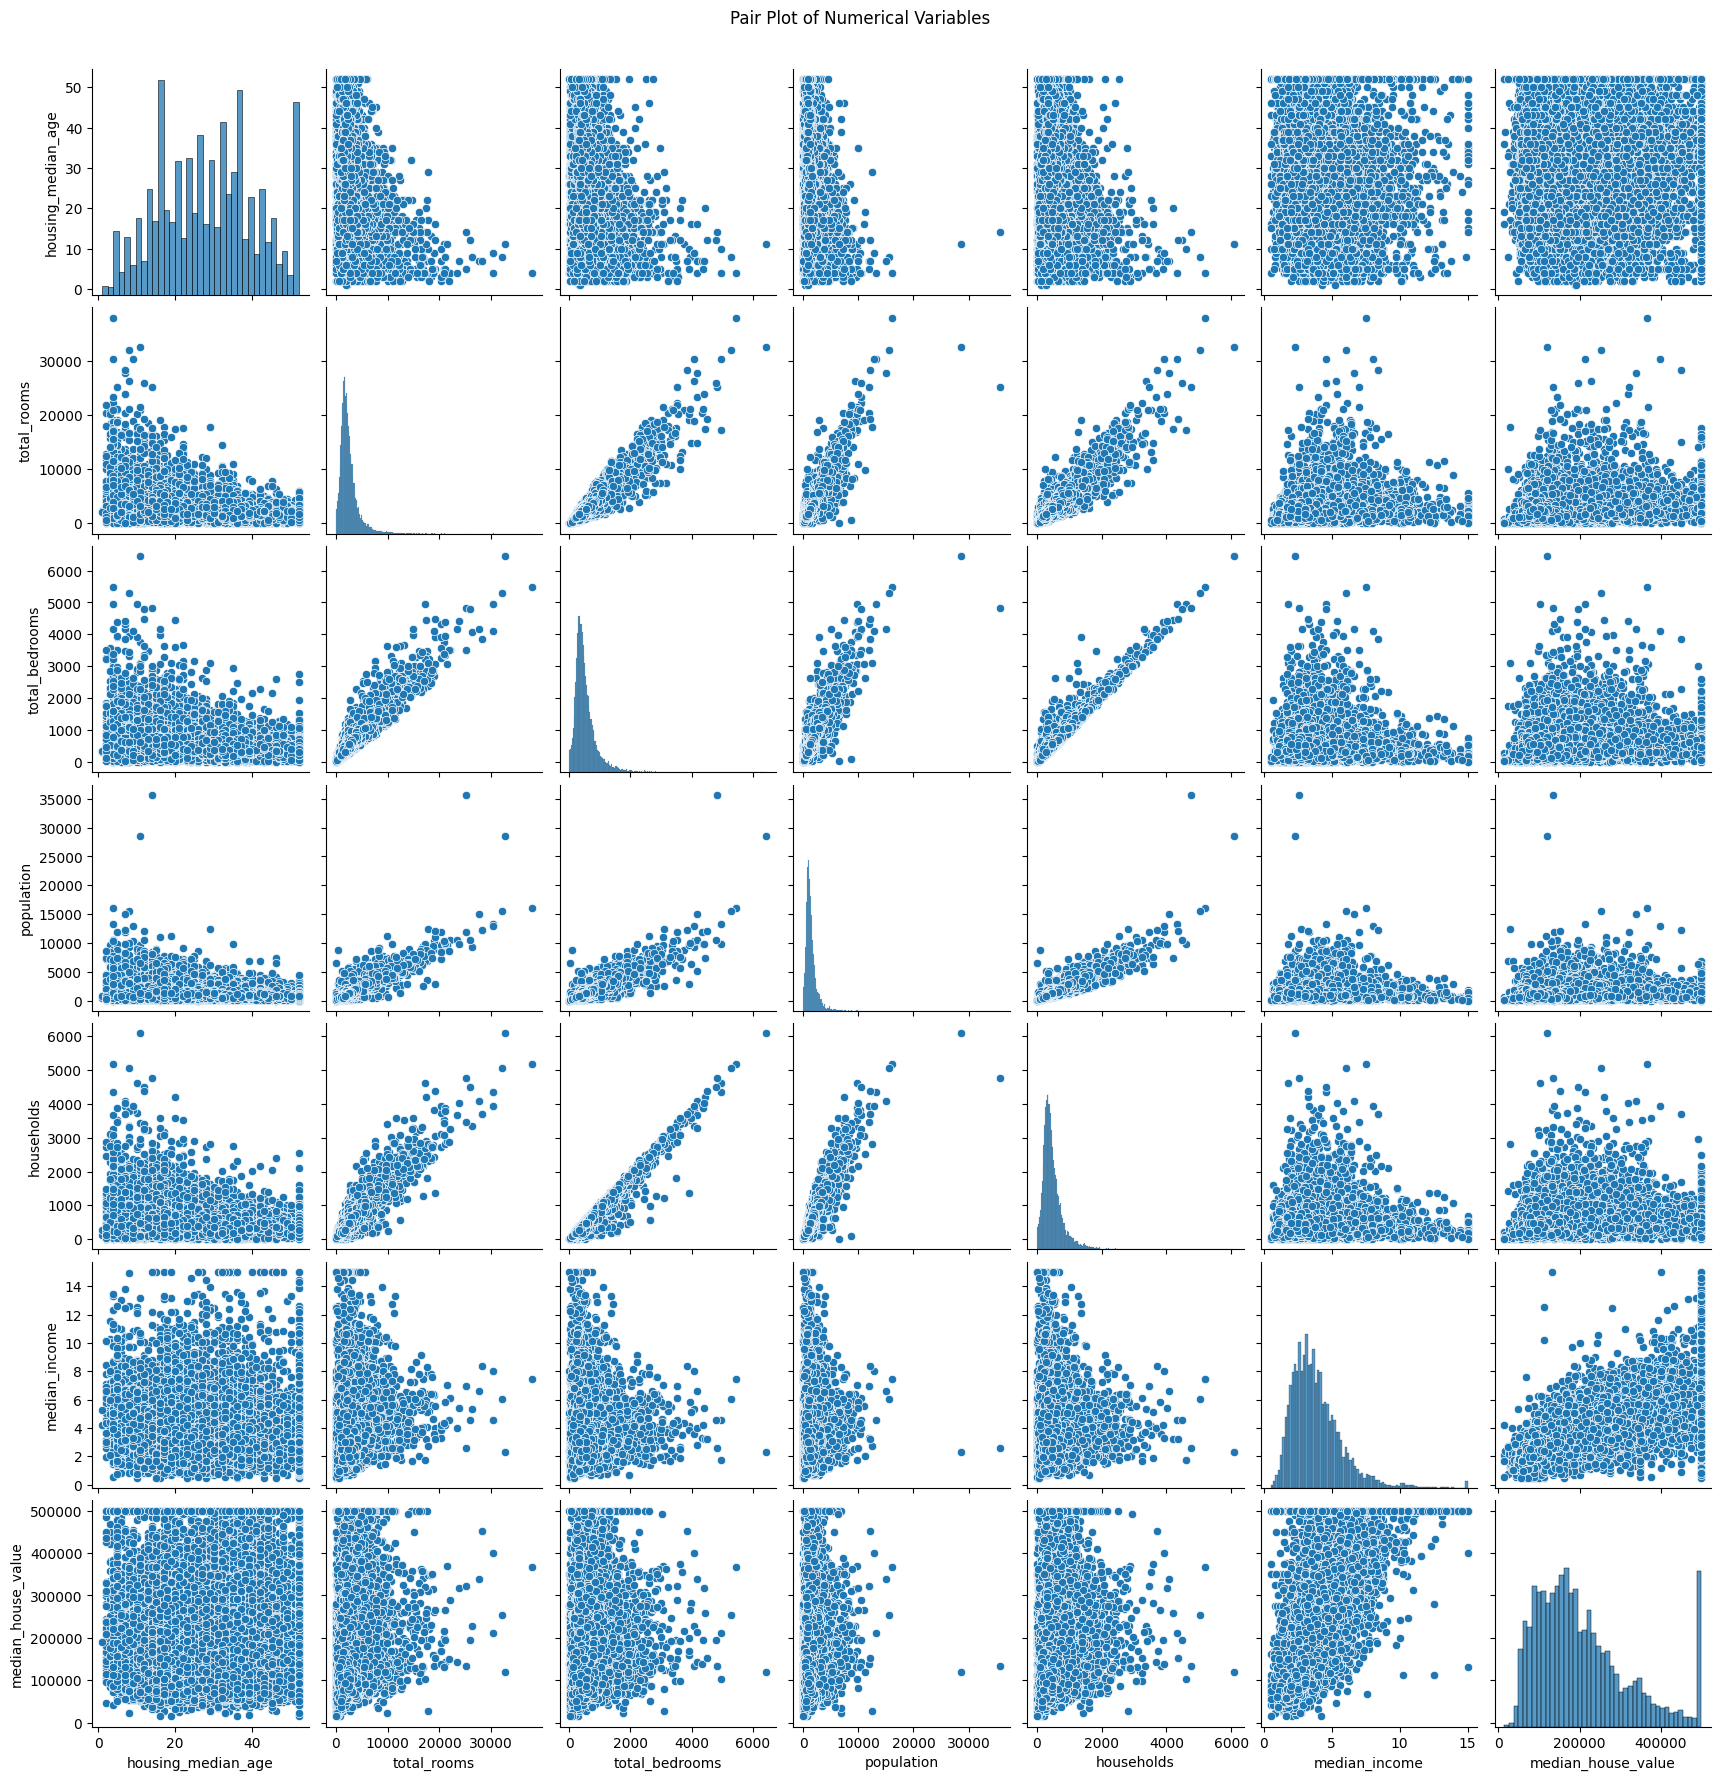

In [57]:
numerical_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
data_subset = data[numerical_cols]

sns.pairplot(data_subset)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)

plt.show()

In [59]:
# data['bill_size_mm'] = (data['bill_length_mm'] * data['bill_depth_mm']).round(2)
# data['body_mass_index'] = (data['body_mass_g'] / data['flipper_length_mm']).round(2)
# data['bill_length_to_depth'] = (data['bill_length_mm'] / data['bill_depth_mm']).round(2)
# data['bill_length_mm_squared'] = (data['bill_length_mm'] ** 2).round(2)
# data.head()

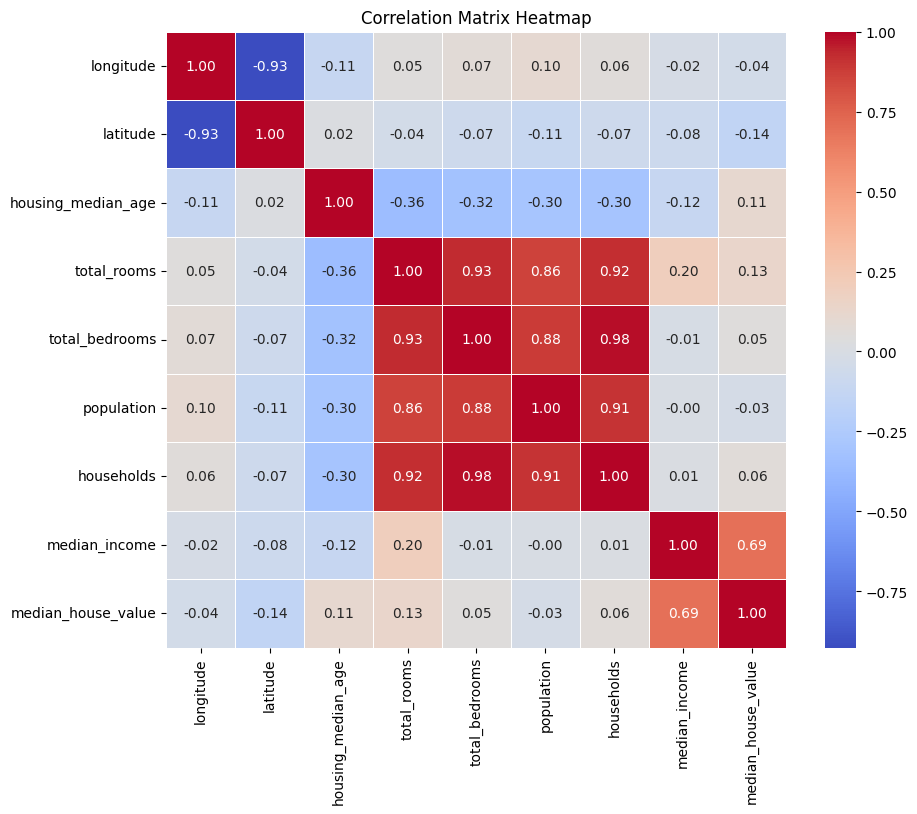

In [60]:
numerical_data = data.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

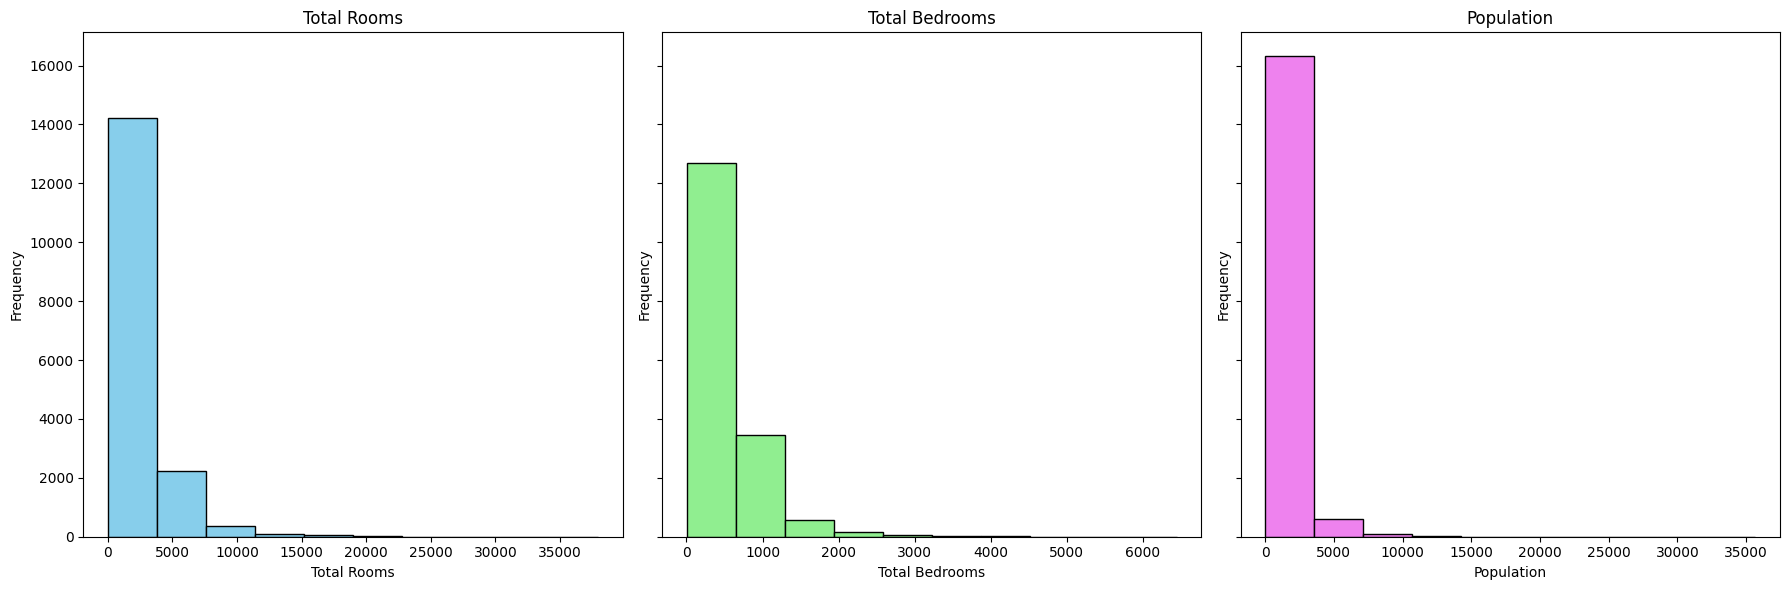

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axs[0].hist(data['total_rooms'], color='skyblue', edgecolor='black')
axs[0].set_title('Total Rooms')
axs[0].set_xlabel('Total Rooms')
axs[0].set_ylabel('Frequency')

axs[1].hist(data['total_bedrooms'], color='lightgreen', edgecolor='black')
axs[1].set_title('Total Bedrooms')
axs[1].set_xlabel('Total Bedrooms')
axs[1].set_ylabel('Frequency')

axs[2].hist(data['population'], color='violet', edgecolor='black')
axs[2].set_title('Population')
axs[2].set_xlabel('Population')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

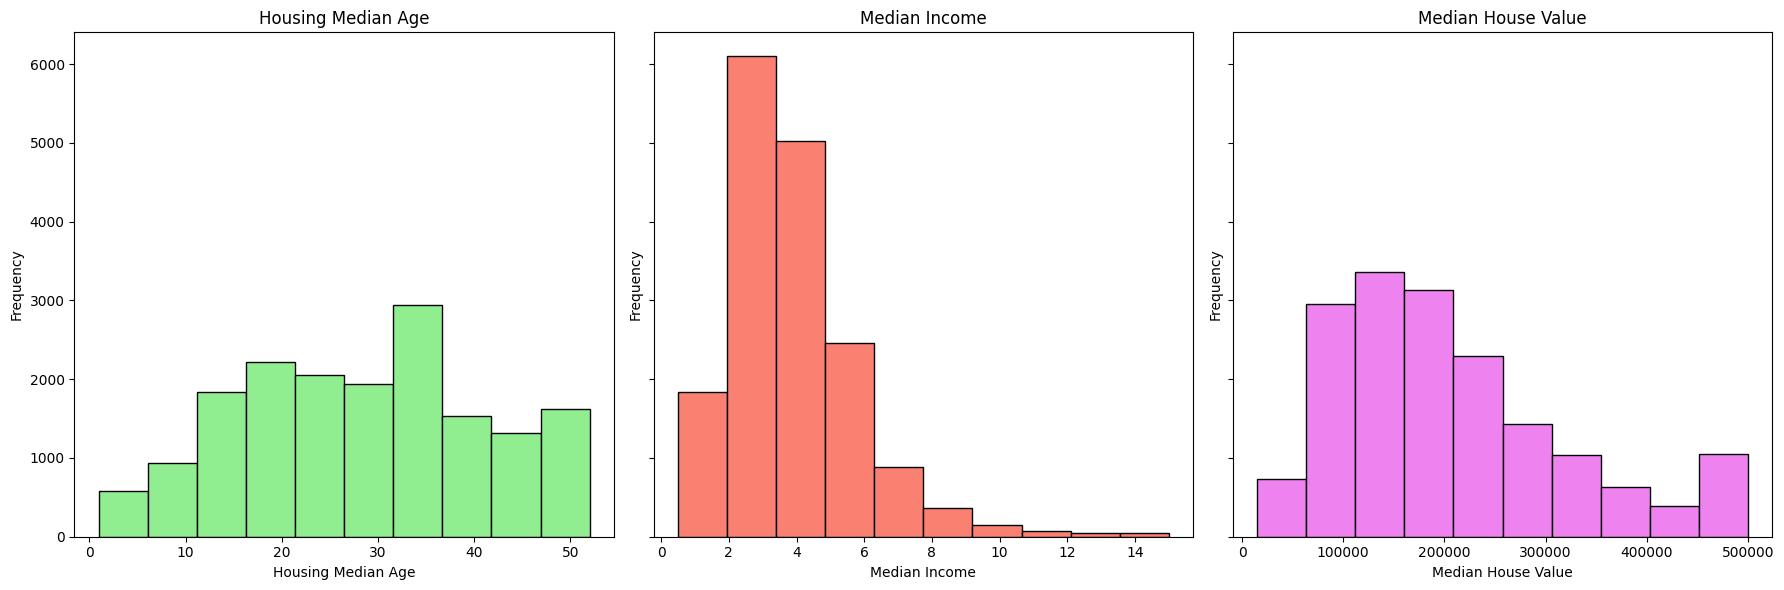

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axs[0].hist(data['housing_median_age'], color='lightgreen', edgecolor='black')
axs[0].set_title('Housing Median Age')
axs[0].set_xlabel('Housing Median Age')
axs[0].set_ylabel('Frequency')

axs[1].hist(data['median_income'], color='salmon', edgecolor='black')
axs[1].set_title('Median Income')
axs[1].set_xlabel('Median Income')
axs[1].set_ylabel('Frequency')

axs[2].hist(data['median_house_value'], color='violet', edgecolor='black')
axs[2].set_title('Median House Value')
axs[2].set_xlabel('Median House Value')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

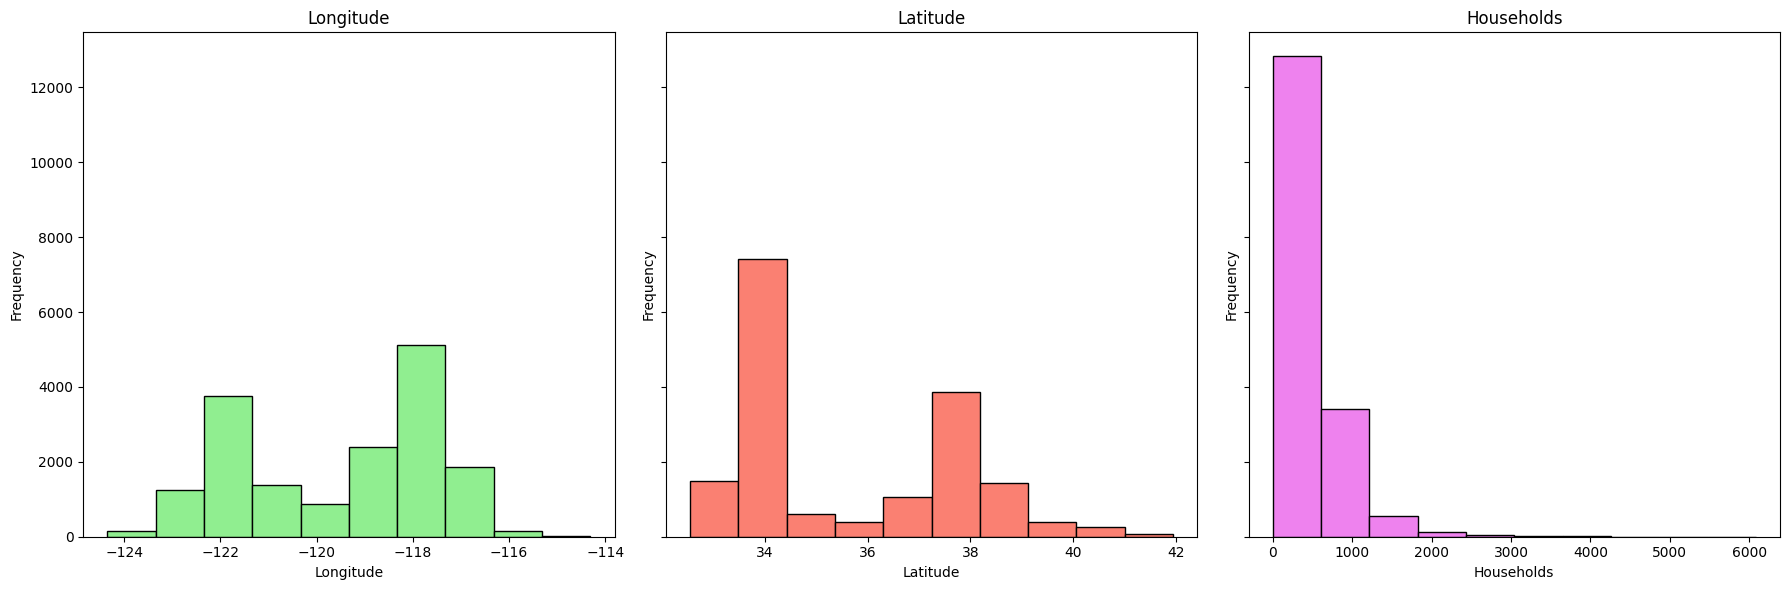

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axs[0].hist(data['longitude'], color='lightgreen', edgecolor='black')
axs[0].set_title('Longitude')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Frequency')

axs[1].hist(data['latitude'], color='salmon', edgecolor='black')
axs[1].set_title('Latitude')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Frequency')

axs[2].hist(data['households'], color='violet', edgecolor='black')
axs[2].set_title('Households')
axs[2].set_xlabel('Households')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

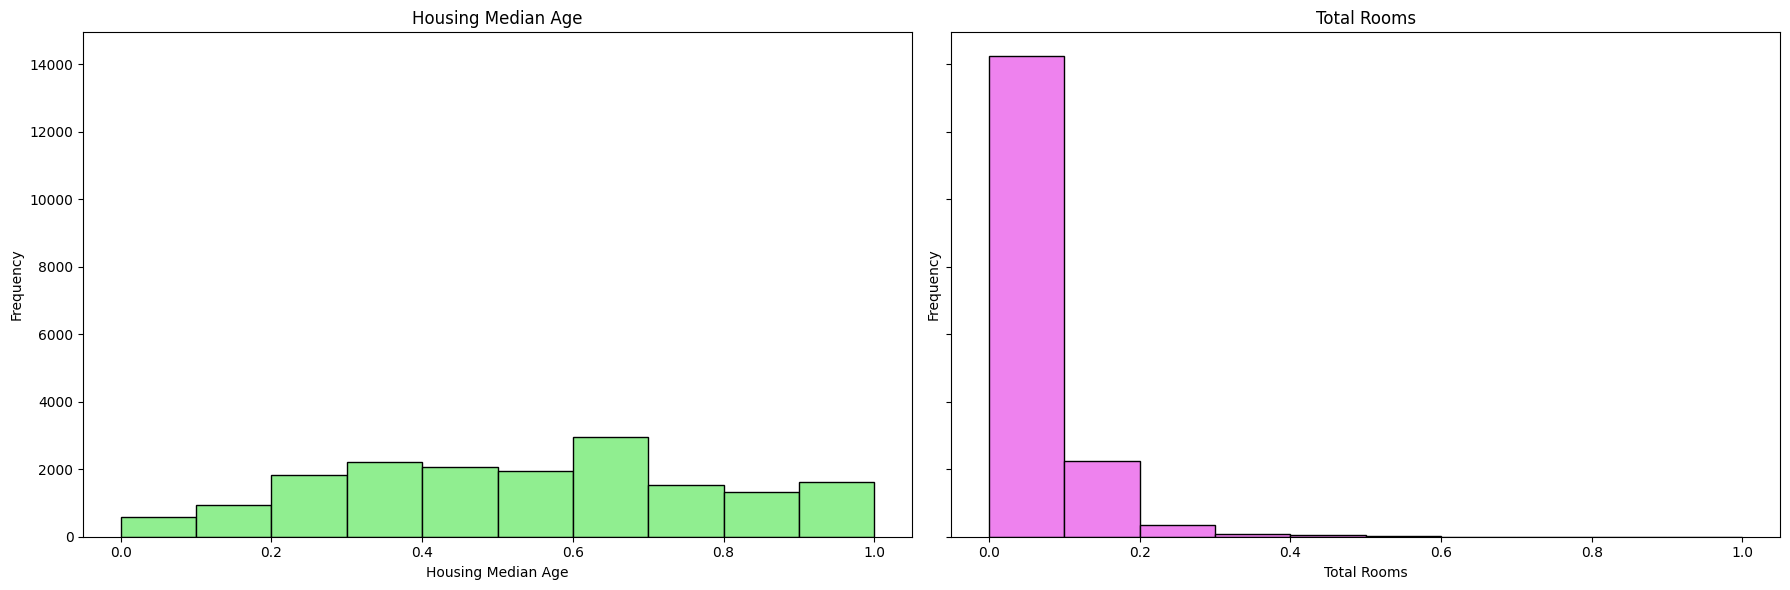

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

axs[0].hist(data['housing_median_age'], color='lightgreen', edgecolor='black')
axs[0].set_title('Housing Median Age')
axs[0].set_xlabel('Housing Median Age')
axs[0].set_ylabel('Frequency')

axs[1].hist(data['total_rooms'], color='violet', edgecolor='black')
axs[1].set_title('Total Rooms')
axs[1].set_xlabel('Total Rooms')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [68]:
columns_to_scale = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [69]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19            0.274510     0.147885        0.198945   
1    -114.47     34.40            0.352941     0.201608        0.294848   
2    -114.56     33.69            0.313725     0.018927        0.026847   
3    -114.57     33.64            0.254902     0.039515        0.052142   
4    -114.57     33.57            0.372549     0.038276        0.050435   

   population  households  median_income  median_house_value  
0    0.028364    0.077454       0.068530            0.107012  
1    0.031559    0.075974       0.091040            0.134228  
2    0.009249    0.019076       0.079378            0.145775  
3    0.014350    0.037000       0.185639            0.120414  
4    0.017405    0.042921       0.098281            0.104125